!scrapy runspider TopicListSpider.py -o TopicList.json

In [68]:
import json
posts = json.load(open('ForumPosts.json', encoding='utf8'))

In [66]:
from bs4 import BeautifulSoup
import re
def cleanup(html):
    text = BeautifulSoup(html,"lxml").get_text().strip(' \n\t\xa0')
    text = re.sub('[ \n|\t|\xa0]+',' ', text)
    text = BeautifulSoup(text,"lxml").get_text()
    text=re.sub('р е к л а м а','', text).strip(' \n\t\xa0')
    return text

cleanup(posts[-3]['text'])


'Чув, що для особливих людей у нас будуть декілька окремих паркомісць Ахах... це ви для себе інфу дізнавались... Беріть собі крайню ліву!!! Буде легше вилазити))) А Ваську і ще тут одному то ті дві інші, щоб свої корита поставили.'

In [69]:
import pandas as pd
df = pd.DataFrame(posts)
df['clean_text']=df['text'].apply(cleanup)
df['topic']=df['topic'].apply(lambda arr: arr[0] if len(arr)>0 else '')

Z:\anaconda\envs\py_36\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://i.piccy.info/i9/138c74337bbcf22693432751942ac68a/1438940400/545106/937178/lypen1.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
Z:\anaconda\envs\py_36\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://i.piccy.info/i9/61196038e572fa1d1dadc7a82a10f5fc/1438940716/454966/937178/lypen3.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
Z:\anaconda\envs\py_36\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://i.piccy.info/i9/0afefe77aaa5768af06a5a9bbcf8f7ca/1438940765/476593/937178/lypen2.jpg" looks lik

In [70]:
df[:5]

,date,text,topic,user_name,clean_text
0,20 кві 2016,"<div class=""messageContent"">\t\t\n\t\t\t<artic...","Велика Британія, 4та черга",WIXIW,Група для тих хто купив або збирається купити ...
1,20 кві 2016,"<div class=""messageContent"">\t\t\n\t\t\t<artic...","Велика Британія, 4та черга",WIXIW,Сьогодні Ріел додав на своєму сайті рекламу 4 ...
2,21 кві 2016,"<div class=""messageContent"">\t\t\n\t\t\t<artic...","Велика Британія, 4та черга",WIXIW,Не встигли укласти договір як ціна виросла на ...
3,18 тра 2016,"<div class=""messageContent"">\t\t\n\t\t\t<artic...","Велика Британія, 4та черга",WIXIW,а чому виросла?
4,30 січ 2018,"<div class=""messageContent"">\t\t\n\t\t\t<artic...","Акції та знижки від забудовників, Нові пропоз...",Novobud,Тема про нові пропозиції від забудовників Льво...


In [74]:
df['topic'].value_counts(sort=True, ascending=False)

ЖК "Ювелірний" -відгуки                                                                                 2525
Квартира "Добра оселя" вул Княгині Ольги                                                                2416
ЖК Набережний квартал на вул. Пулюя                                                                     1555
ЖК "Велика британія" - Ріел                                                                             1417
Відгуки про Креатор Буд а конкретно ЖК Квіти Львова                                                     1193
Новобуди від Ріел. Які враження?                                                                         869
Квартира в Житловому комплексі по вул.Демнянській - відгуки, обговорення                                 719
Житло в новобудовах винники                                                                              620
ЖК "МАРКО ПОЛО"                                                                                          585
Новобудови від ГалЖ

In [97]:
month_dict={'кві':'04', 'тра':'05', 'січ':'01', 'лют':'02', 'бер':'03', 'гру':'12', 'вер':'09', 'чер':'06', 'лис':'11','сер':'08', 'лип':'07', 'жов':'10'}
def get_month(date):
    parts= date.split(' ')
    return "{0}-{1}".format(parts[2],month_dict[parts[1]])

In [98]:
df['month']=df['date'].apply(get_month)

In [110]:
post_count_by_month = df['month'].value_counts()
print(post_count_by_month[:10])
post_count_by_month=post_count_by_month.sort_index()

2014-06    889
2014-07    784
2014-08    636
2014-11    608
2015-06    608
2014-09    594
2015-07    585
2015-08    555
2014-10    488
2014-05    472
Name: month, dtype: int64


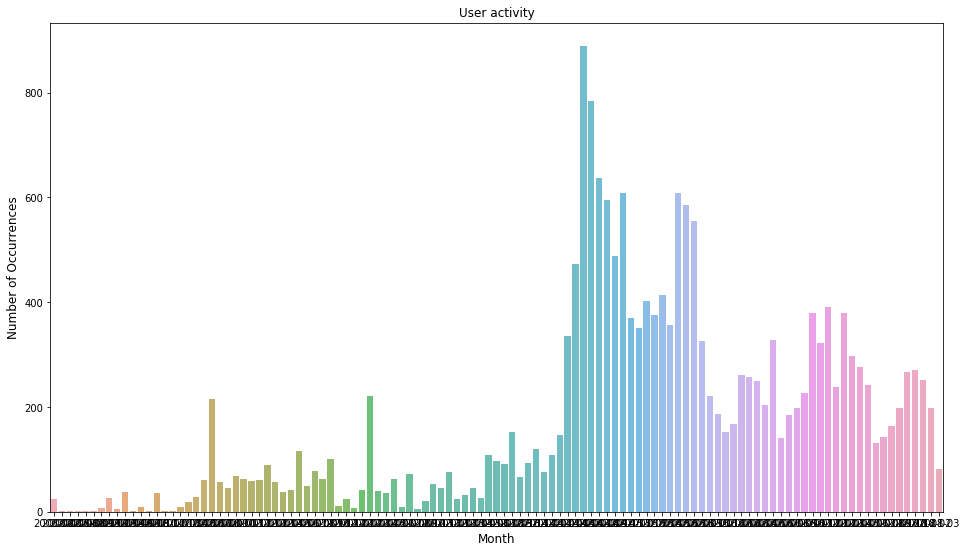

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(16,9))
sns.barplot(post_count_by_month.index, post_count_by_month.values, alpha=0.8)
plt.title('User activity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [114]:
from nltk import ngrams

def get_ngrams(ngram_range, sentenses): 
    words=[]
    for n in ngram_range:
        for name in sentenses:
            words=words+ [ ' '.join(ngram) for ngram in   ngrams(name.split(), n)]
    return words



In [115]:
words = get_ngrams(range(1,4),df['clean_text'].values)
from collections import Counter
word_counter = Counter(words)
word_counter.most_common(200)

Z:\anaconda\envs\py_36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


[('не', 25070),
 ('в', 24609),
 ('і', 23908),
 ('на', 22010),
 ('що', 15031),
 ('від', 14724),
 ('щоб', 13470),
 ('з', 12793),
 ('-', 11374),
 ('розгорнути...', 11191),
 ('щоб розгорнути...', 11191),
 ('Цитата', 10992),
 ('Цитата від', 10949),
 ('↑', 10945),
 ('у', 8668),
 ('а', 7755),
 ('то', 6841),
 ('за', 6761),
 ('це', 6757),
 ('до', 6544),
 ('як', 6218),
 ('я', 5589),
 ('по', 5454),
 ('А', 5157),
 ('вже', 4957),
 ('чи', 4787),
 ('про', 4670),
 ('ще', 4524),
 ('буде', 4477),
 ('та', 4454),
 ('є', 4190),
 ('так', 4177),
 ('але', 4065),
 ('для', 3936),
 ('там', 3754),
 ('все', 3516),
 ('----------', 3304),
 ('якщо', 2971),
 ('Я', 2817),
 ('и', 2808),
 ('ви', 2724),
 (',', 2571),
 ('вони', 2479),
 ('можна', 2460),
 ('В', 2274),
 ('які', 2194),
 ('І', 2092),
 ('тут', 2032),
 ('дуже', 1995),
 ('б', 1977),
 ('був', 1958),
 ('бо', 1947),
 ('всі', 1931),
 ('ж', 1910),
 ('коли', 1872),
 ('може', 1842),
 ('тому', 1834),
 ('мене', 1830),
 ('хто', 1781),
 ('або', 1753),
 ('ми', 1721),
 ('було'

In [116]:
len(word_counter)

1557918